In [6]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Loading the Datasets
wine_white=pd.read_csv('winequality_white.csv',sep =';')
wine_red=pd.read_csv('winequality_red.csv',sep =';')

# RED WINE DATASET

In [8]:
# Scaling and Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine_red)
scaled_data = scaler.transform(wine_red)

In [9]:
# PCA for Red wine dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [10]:
# Assigning the variables
x=x_pca
y=wine_red['quality']

In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
# Random Forest Classifier Model Building
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=700)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)

In [121]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))
print('\n')
print(accuracy_score(y_test,rfc_pred))

[[  0   1   0   0   0   0]
 [  0   6  11   0   0   0]
 [  0   0 185  10   0   0]
 [  0   0   5 194   1   0]
 [  0   0   0   9  52   0]
 [  0   0   0   0   4   2]]


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.86      0.35      0.50        17
          5       0.92      0.95      0.93       195
          6       0.91      0.97      0.94       200
          7       0.91      0.85      0.88        61
          8       1.00      0.33      0.50         6

avg / total       0.91      0.91      0.91       480



0.9145833333333333


C:\Users\IIITG\Anaconda3\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# WHITE WINE DATASET

In [14]:
# Scaling and Standardizing the features and PCA for white wine dataset
scaler1 = StandardScaler()
scaler1.fit(wine_white)
scaled_data1 = scaler1.transform(wine_white)
pca1 = PCA(n_components=10)
pca1.fit(scaled_data1)
x_pca1 = pca1.transform(scaled_data1)

In [15]:
# Assigning the variables
X=x_pca1
Y=wine_white['quality']

In [17]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [18]:
# Random Forest Classifier Model Building
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(n_estimators=700)
rfc1.fit(X_train,Y_train)
rfc_pred1=rfc1.predict(X_test)

In [19]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,rfc_pred1))
print('\n')
print(classification_report(Y_test,rfc_pred1))
print('\n')
print(accuracy_score(Y_test,rfc_pred1))

[[  0   4   3   0   0   0]
 [  0  20  20   0   0   0]
 [  0   1 411  14   0   0]
 [  0   0   4 661   3   0]
 [  0   0   0  22 258   0]
 [  0   0   0   0   9  40]]


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         7
          4       0.80      0.50      0.62        40
          5       0.94      0.96      0.95       426
          6       0.95      0.99      0.97       668
          7       0.96      0.92      0.94       280
          8       1.00      0.82      0.90        49

avg / total       0.94      0.95      0.94      1470



0.9455782312925171


C:\Users\IIITG\Anaconda3\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Feature ranking:
1. feature 1 (0.373353)
2. feature 7 (0.166560)
3. feature 6 (0.111101)
4. feature 2 (0.085402)
5. feature 8 (0.063290)
6. feature 0 (0.057092)
7. feature 4 (0.056947)
8. feature 5 (0.048537)
9. feature 3 (0.037718)


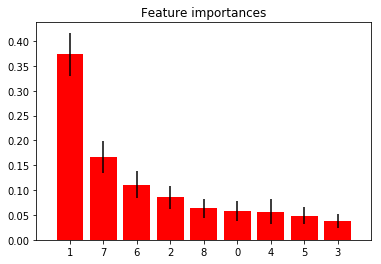

In [20]:
# Checking the importance of each features in a dataset
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()